<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 54.2 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 136.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 176.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 180.6 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=9a70a5ccebdd6ab17b21aa83dee2a36c5d2f10b7cde94f0c704b4dbbac10ccf8
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=303862 sha256=ae0138db800abca40b6695312963fd0fdd2747179be0e864bd81394304f70a46
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d1/

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [8]:
Tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [9]:
#Extracing share price
tesla_data = Tesla.history(period="max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-14 00:00:00-04:00,317.730011,322.600006,312.670013,316.899994,78043400,0.0,0.0
2025-07-15 00:00:00-04:00,319.679993,321.200012,310.500000,310.779999,77556300,0.0,0.0
2025-07-16 00:00:00-04:00,312.799988,323.500000,312.619995,321.670013,97284800,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [10]:
#reset index
tesla_data.reset_index(inplace=True)

In [11]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [45]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [46]:
html_data  = requests.get(url).text
print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [108]:
soup = BeautifulSoup(html_data, 'html.parser')



Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [142]:
Tesla_Revenue = pd.DataFrame(columns=["Date", "Revenue"])    

soup.find_all("tbody")[1]
table = soup.find_all("tbody")[1]

for row in table.find_all("tr"):
    cols = row.find_all("td")
    Date = cols[0].text.strip()
    Revenue = cols[1].text.strip()
    print(date, revenue)
    
    
    
    # Finally we append the data of each row to the table
    Tesla_Revenue = pd.concat([Tesla_Revenue, pd.DataFrame({"Date":[Date], "Revenue":[Revenue]})], ignore_index=True)    

2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27
2009-06-30 $27


In [143]:
Tesla_Revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


In [144]:
Tesla_Revenue.tail()

,Date,Revenue
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,
52,2009-09-30,$46
53,2009-06-30,$27


In [148]:
Tesla_Revenue.reset_index(drop=True, inplace=True)

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [149]:
#solution if u already run,  but you run the function again, and it doesn't work, u can make a copy
tesla_revenue = Tesla_Revenue.copy()

In [150]:
tesla_revenue["Revenue"] = Tesla_Revenue['Revenue'].str.replace(',|\$',"",regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [151]:
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [152]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [ ]:
## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [6]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 141.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 154.0 MB/s eta 0:00:00


In [7]:
!pip install --upgrade plotly

In [8]:
import yfinance as yf
import pandas as pd


In [9]:
gme = yf.Ticker("GME")

In [10]:
#Extracing share price
GameStop = gme.history(period="max")

In [11]:
GameStop

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-16 00:00:00-04:00,23.400000,23.850000,23.309999,23.680000,7738300,0.0,0.0
2025-07-17 00:00:00-04:00,23.540001,23.719999,23.379999,23.400000,7307200,0.0,0.0
2025-07-18 00:00:00-04:00,23.459999,23.510000,23.129999,23.280001,6628400,0.0,0.0


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [12]:
#reset index
GameStop.reset_index(inplace=True)

In [13]:
GameStop.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [70]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [71]:
webb= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [72]:
html_data_2  = requests.get(webb).text
print(html_data_2)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [73]:
soup = BeautifulSoup(html_data_2 , 'html.parser')

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


In [74]:

soup.find_all("tbody")[1]
table = soup.find_all("tbody")[1]

for row in table.find_all("tr"):
    cols = row.find_all("td")
    Date = cols[0].text.strip()
    Revenue = cols[1].text.strip()
    print(Date, Revenue)
    
    
    # Finally we append the data of each row to the table
    gme_revenue  = pd.concat([gme_revenue, pd.DataFrame({"Date":[Date], "Revenue":[Revenue]})], ignore_index=True)    

2020-04-30 $1,021
2020-01-31 $2,194
2019-10-31 $1,439
2019-07-31 $1,286
2019-04-30 $1,548
2019-01-31 $3,063
2018-10-31 $1,935
2018-07-31 $1,501
2018-04-30 $1,786
2018-01-31 $2,825
2017-10-31 $1,989
2017-07-31 $1,688
2017-04-30 $2,046
2017-01-31 $2,403
2016-10-31 $1,959
2016-07-31 $1,632
2016-04-30 $1,972
2016-01-31 $3,525
2015-10-31 $2,016
2015-07-31 $1,762
2015-04-30 $2,061
2015-01-31 $3,476
2014-10-31 $2,092
2014-07-31 $1,731
2014-04-30 $1,996
2014-01-31 $3,684
2013-10-31 $2,107
2013-07-31 $1,384
2013-04-30 $1,865
2013-01-31 $3,562
2012-10-31 $1,773
2012-07-31 $1,550
2012-04-30 $2,002
2012-01-31 $3,579
2011-10-31 $1,947
2011-07-31 $1,744
2011-04-30 $2,281
2011-01-31 $3,693
2010-10-31 $1,899
2010-07-31 $1,799
2010-04-30 $2,083
2010-01-31 $3,524
2009-10-31 $1,835
2009-07-31 $1,739
2009-04-30 $1,981
2009-01-31 $3,492
2008-10-31 $1,696
2008-07-31 $1,804
2008-04-30 $1,814
2008-01-31 $2,866
2007-10-31 $1,611
2007-07-31 $1,338
2007-04-30 $1,279
2007-01-31 $2,304
2006-10-31 $1,012
2006-07-31

> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [75]:
gme_revenue

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
...,...,...
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


In [76]:
print(gme_revenue.dtypes)

Date       object
Revenue    object
dtype: object


In [77]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)

In [78]:
gme_revenue = gme_revenue.copy()

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [79]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [195]:
tesla_revenue

,index,Date,Revenue
52,53,2009-06-30,27
51,52,2009-09-30,46
50,50,2010-03-31,21
49,49,2010-06-30,28
48,48,2010-09-30,31
47,47,2010-12-31,36
46,46,2011-03-31,49
45,45,2011-06-30,58
44,44,2011-09-30,58
43,43,2011-12-31,39


In [199]:
print(tesla_revenue.dtypes)

level_0     int64
index       int64
Date       object
Revenue     int64
dtype: object


In [222]:
tesla_revenue.drop("index", axis=1, inplace=True)

In [203]:
tesla_revenue

,Date,Revenue
0,2009-06-30,27
1,2009-09-30,46
2,2010-03-31,21
3,2010-06-30,28
4,2010-09-30,31
5,2010-12-31,36
6,2011-03-31,49
7,2011-06-30,58
8,2011-09-30,58
9,2011-12-31,39


In [223]:
tesla_revenue.iloc[0:48]

,Date,Revenue
0,2009,27
1,2009,46
2,2010,21
3,2010,28
4,2010,31
5,2010,36
6,2011,49
7,2011,58
8,2011,58
9,2011,39


In [213]:
tesla_revenue1= tesla_revenue.iloc[0:48]

In [211]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(int)

In [224]:
tesla_revenue.reset_index(inplace=True)

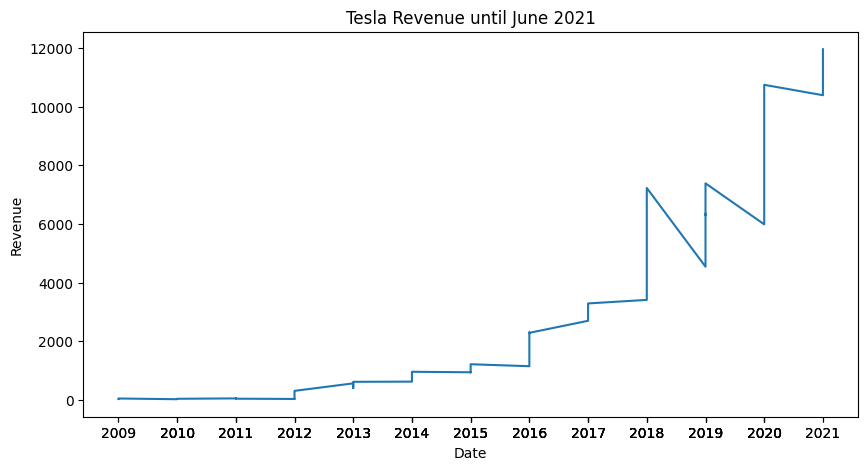

In [215]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(tesla_revenue1["Date"], tesla_revenue1["Revenue"])
plt.title("Tesla Revenue until June 2021")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(tesla_revenue1["Date"]) 
plt.show()

<Axes: xlabel='Date'>

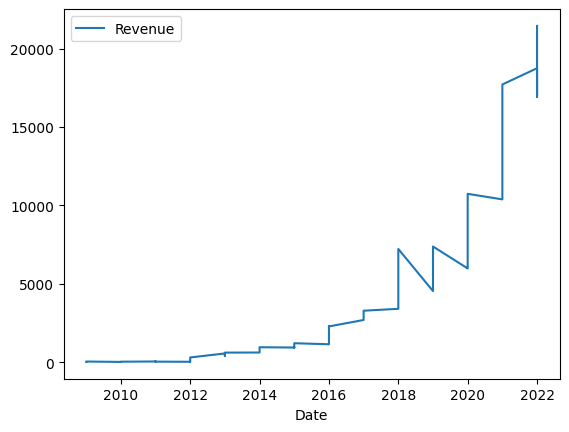

In [225]:
tesla_revenue.plot(x="Date", y="Revenue")

In [216]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(tesla_revenue1="Date", row=1, col=1)
    fig.update_xaxes(tesla_revenue1="Date", row=2, col=1)
    fig.update_yaxes(tesla_revenue1="Price ($US)", row=1, col=1)
    fig.update_yaxes(tesla_revenue1="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

In [159]:
!pip install plotly

In [44]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = tesla_data[tesla_data.Date <= '2021-06-14']
    revenue_data_specific = tesla_data[tesla_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(tesla_data="Date", row=1, col=1)
    fig.update_xaxes(tesla_data="Date", row=2, col=1)
    fig.update_yaxes(tesla_data="Price ($US)", row=1, col=1)
    fig.update_yaxes(tesla_data="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))




## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


In [32]:
!pip install matplotlib

In [84]:
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date']) 
gme_revenue['Date'] = gme_revenue['Date'].dt.year

In [85]:
gme_revenue

,index,Date,Revenue
0,0,2020,1021
1,1,2020,2194
2,2,2019,1439
3,3,2019,1286
4,4,2019,1548
...,...,...,...
57,57,2006,1667
58,58,2005,534
59,59,2005,416
60,60,2005,475


In [93]:
gme_revenue.drop("index", axis = 1, inplace = True)

In [91]:
gme_revenue.reset_index(inplace=True)

In [149]:
gme_revenue

,Date,Revenue
0,2020,1021
1,2020,2194
2,2019,1439
3,2019,1286
4,2019,1548
...,...,...
57,2006,1667
58,2005,534
59,2005,416
60,2005,475


In [150]:
gme_revenue1 = gme_revenue.iloc[0:20]

In [151]:
gme_revenue1

,Date,Revenue
0,2020,1021
1,2020,2194
2,2019,1439
3,2019,1286
4,2019,1548
5,2019,3063
6,2018,1935
7,2018,1501
8,2018,1786
9,2018,2825


In [172]:
print(gme_revenue1.dtypes)


Date       int32
Revenue    int64
dtype: object


In [152]:
#mengubah revenue menjadi integer
gme_revenue1["Revenue"] = gme_revenue1["Revenue"].astype(int)

/tmp/ipykernel_300/4279812245.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
gme_revenue1.copy()

,Date,Revenue
0,2020,1021
1,2020,2194
2,2019,1439
3,2019,1286
4,2019,1548
5,2019,3063
6,2018,1935
7,2018,1501
8,2018,1786
9,2018,2825


In [175]:
#mengelompokkan berdasarkan tahun
gme_revenue1.groupby("Date")["Revenue"].sum()

Date
2015    3778
2016    9088
2017    8126
2018    8047
2019    7336
2020    3215
Name: Revenue, dtype: int64

In [166]:
#karena setelah dikelompokkan akan menjadi series, maka harus diubah ke dataframe lagi
gme_revenuee = gme_revenue1.groupby("Date")["Revenue"].sum()
gme_revenuee2 = pd.DataFrame(gme_revenuee)

In [167]:
gme_revenuee2

,Revenue
Date,
2015,3778
2016,9088
2017,8126
2018,8047
2019,7336
2020,3215


In [170]:
#di reset lagi indexnya
gme_revenuee2.reset_index(inplace=True)

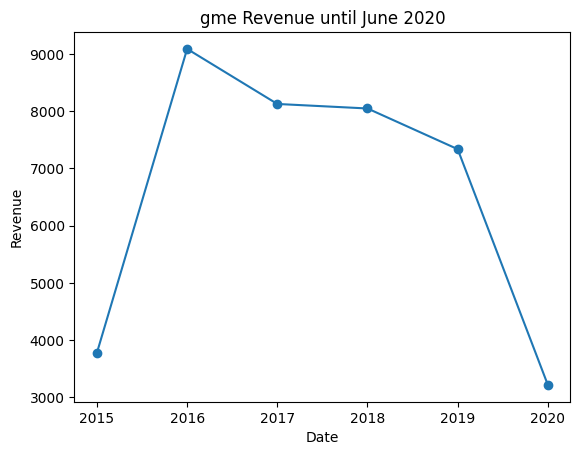

In [171]:
import matplotlib.pyplot as plt


def make_graph(stock_data, revenue_data, stock):
    plt.figure(figsize=(10, 20))
        
plt.plot(gme_revenuee2["Date"], gme_revenuee2["Revenue"], marker='o')
plt.title("gme Revenue until June 2020")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(gme_revenuee2["Date"]) 
plt.show()


<Axes: xlabel='Date'>

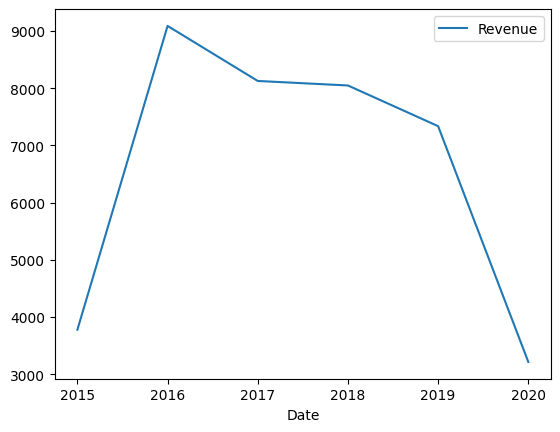

In [173]:
gme_revenuee2.plot(x="Date", y="Revenue")

In [179]:
import plotly.graph_objs as go 
from plotly.subplots import make_subplots

fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True,
                    subplot_titles = ("Tesla Stock Price", "Tesla revenue"),
                    vertical_spacing = 0.2)

fig.add_trace(go.Scatter(x = tesla_data["Date"], y = tesla_data ["Revenue"], name "TSLA Stock"), row =1, col =1)
fig.add_trace(go.Scatter(x = tesla_revenue["Date"], y = tesla_revenue ["Revenue"], name "TSLA Revenue"), row =1, col =1)

fig.update_layout(height = 600, title_text = "Tesla Stock Price vs Revenue", showlegends = True)
fig.show()

SyntaxError: positional argument follows keyword argument (1421031106.py, line 8)

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
